# Hurto a personas en el transporte publico

Realizar:

* Limpieza
* Analizar los hurtos para el último año en el conjunto de datos (esto implica procesar los datos para extraer las fechas)
* Revisar qué barrios son los que tienen mayores hurtos
* Encontrar los cinco objetos mas frecuentes en los hurtos
* Para los objetos más frecuentes, encontrar qué modalidad de hurto tuvieron.

In [237]:
# Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import re

In [238]:
# Lectura de datos
df = pd.read_csv("hurto_a_persona_transporte_publico.csv", sep=",")
df.head()

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,codigo_comuna,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida
0,2015-01-06T11:00:00.000-05:00,1.0,6.266535,-75.566090,Mujer,23,Soltero(a),Sin dato,Sin dato,Sin dato,...,4,Vía pública,Aranjuez,Celular,Tecnología,Mercancía,-1,Sin dato,Sin dato,Sin dato
1,2015-01-07T18:30:00.000-05:00,1.0,6.232246,-75.572194,Hombre,35,Casado(a),Sin dato,Sin dato,Sin dato,...,10,Bus de servicio público,Candelaria,Accesorios prendas de vestir,Prendas de vestir y accesorios,Mercancía,-1,Sin dato,Sin dato,Sin dato
2,2015-01-07T02:00:00.000-05:00,1.0,6.213172,-75.577964,Mujer,23,Casado(a),Sin dato,Sin dato,Sin dato,...,14,Estación del Metro,Poblado,Celular,Tecnología,Mercancía,-1,Negro,Sin dato,Sin dato
3,2015-01-08T20:00:00.000-05:00,1.0,6.262104,-75.563932,Hombre,17,Soltero(a),Sin dato,Sin dato,Sin dato,...,10,Bus de servicio público,Candelaria,Maletín,Otros elementos,Mercancía,-1,Sin dato,Sin dato,Sin dato
4,2015-01-09T18:00:00.000-05:00,1.0,6.212017,-75.577838,Mujer,33,Soltero(a),Sin dato,Sin dato,Sin dato,...,14,Estación del Metro,Poblado,Cédula,Documentos,Mercancía,-1,Sin dato,Sin dato,Sin dato


In [239]:
# Fecha a date time
df["fecha_hecho"] = pd.to_datetime(df["fecha_hecho"])
df["Año"] = df["fecha_hecho"].dt.year
df["Mes"] = df["fecha_hecho"].dt.month

In [240]:
df.shape

(27022, 37)

In [241]:
df.columns

Index(['fecha_hecho', 'cantidad', 'latitud', 'longitud', 'sexo', 'edad',
       'estado_civil', 'grupo_actor', 'actividad_delictiva', 'parentesco',
       'ocupacion', 'discapacidad', 'grupo_especial', 'medio_transporte',
       'nivel_academico', 'testigo', 'conducta', 'modalidad',
       'caracterizacion', 'conducta_especial', 'arma_medio', 'articulo_penal',
       'categoria_penal', 'nombre_barrio', 'codigo_barrio', 'codigo_comuna',
       'lugar', 'sede_receptora', 'bien', 'categoria_bien', 'grupo_bien',
       'modelo', 'color', 'permiso', 'unidad_medida', 'Año', 'Mes'],
      dtype='object')

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27022 entries, 0 to 27021
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   fecha_hecho          27022 non-null  datetime64[ns, UTC-05:00]
 1   cantidad             27022 non-null  float64                  
 2   latitud              24594 non-null  float64                  
 3   longitud             24594 non-null  float64                  
 4   sexo                 27022 non-null  object                   
 5   edad                 27022 non-null  int64                    
 6   estado_civil         27022 non-null  object                   
 7   grupo_actor          27022 non-null  object                   
 8   actividad_delictiva  27022 non-null  object                   
 9   parentesco           27022 non-null  object                   
 10  ocupacion            27022 non-null  object                   
 11  di

In [243]:
df.describe()

,cantidad,latitud,longitud,edad,modelo,Año,Mes
count,27022.0,24594.000000,24594.000000,27022.000000,27022.000000,27022.000000,27022.000000
mean,1.0,6.247312,-75.574967,35.497484,-0.777071,2018.518133,6.731552
std,0.0,0.024825,0.015213,13.072794,21.156783,3.670229,3.465675
min,1.0,6.092238,-75.692301,-1.000000,-1.000000,2004.000000,1.000000
25%,1.0,6.233437,-75.581104,25.000000,-1.000000,2017.000000,4.000000
50%,1.0,6.247840,-75.571174,33.000000,-1.000000,2019.000000,7.000000
75%,1.0,6.260760,-75.566819,44.000000,-1.000000,2021.000000,10.000000
max,1.0,6.344199,-75.489218,91.000000,2009.000000,2023.000000,12.000000


In [244]:
# Duplicados
duplicados = df.duplicated().sum()
print(f'Tamaño antes de eliminar: {df.shape}')
print(f"Se tienen {duplicados} duplicados.")
df.drop_duplicates(inplace= True)
print(f'Tamaño después de eliminar: {df.shape}')
df.reset_index(inplace=True,drop=True)


Tamaño antes de eliminar: (27022, 37)
Se tienen 1283 duplicados.
Tamaño después de eliminar: (25739, 37)


In [245]:
# Valores unicos
valores_unicos = df.nunique().sort_values().reset_index()
valores_unicos = valores_unicos.rename(columns = {"index":"variable",0:"# unicos"})
valores_unicos

,variable,# unicos
0,caracterizacion,1
1,categoria_penal,1
2,conducta,1
3,testigo,1
4,nivel_academico,1
5,grupo_especial,1
6,discapacidad,1
7,articulo_penal,1
8,parentesco,1
9,ocupacion,1


Se tiene columnas con un solo valor unico por lo que estas se podrian borrar directamente. 15 columnas con solo un valor unico, por curiosidad revisare que valor tiene

In [246]:
error_unicos = valores_unicos[valores_unicos["# unicos"] <2]
for columna in error_unicos["variable"]:
    print(df[columna].unique())

['Sin dato']
['Sin dato']
['Hurto a persona']
['Sin dato']
['Sin dato']
['Sin dato']
['Sin dato']
['Sin dato']
['Sin dato']
['Sin dato']
['Sin dato']
['Sin dato']
['Sin dato']
[1.]
['Sin dato']


Confirmado, el aporte de las columnas no es relevante

In [247]:
# Eliminación columnas <2 valores unicos
print(f"Tamaño antes de eliminar {df.shape}")
df_clean = df.drop(columns=error_unicos["variable"])
print(f"Tamaño despues de eliminar {df_clean.shape}")

Tamaño antes de eliminar (25739, 37)
Tamaño despues de eliminar (25739, 22)


In [248]:
# Datos faltantes
valores_nulos = df_clean.isnull().sum().sort_values(ascending=False).reset_index()
valores_nulos = valores_nulos.rename(columns = {"index":"variable",0:"# nulos"})
valores_nulos["% nulos"] = (valores_nulos["# nulos"] / len(df_clean)) * 100
valores_nulos[valores_nulos["# nulos"] > 0]

,variable,# nulos,% nulos
0,longitud,2189,8.504604
1,latitud,2189,8.504604


Columnas irrelevantes

In [249]:
columna_eliminar = ['fecha_hecho', 'latitud', 'longitud','codigo_barrio', "modelo", "color", "estado_civil"]
print(f"Tamaño antes de eliminar {df_clean.shape}")
df_clean = df_clean.drop(columns=columna_eliminar)
print(f"Tamaño despues de eliminar {df_clean.shape}")

Tamaño antes de eliminar (25739, 22)
Tamaño despues de eliminar (25739, 15)


El nombre y codigo de barrio tiene diferentes valores unicos por lo que se podria intentar revisar pero en este caso me quedare con nombre_barrio

In [250]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25739 entries, 0 to 25738
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sexo               25739 non-null  object
 1   edad               25739 non-null  int64 
 2   medio_transporte   25739 non-null  object
 3   modalidad          25739 non-null  object
 4   conducta_especial  25739 non-null  object
 5   arma_medio         25739 non-null  object
 6   nombre_barrio      25739 non-null  object
 7   codigo_comuna      25739 non-null  object
 8   lugar              25739 non-null  object
 9   sede_receptora     25739 non-null  object
 10  bien               25739 non-null  object
 11  categoria_bien     25739 non-null  object
 12  grupo_bien         25739 non-null  object
 13  Año                25739 non-null  int32 
 14  Mes                25739 non-null  int32 
dtypes: int32(2), int64(1), object(12)
memory usage: 2.7+ MB


In [251]:
valores_unicos = df_clean.nunique().sort_values().reset_index()
valores_unicos = valores_unicos.rename(columns = {"index":"variable",0:"# unicos"})
valores_unicos

,variable,# unicos
0,sexo,3
1,medio_transporte,3
2,grupo_bien,5
3,arma_medio,6
4,Mes,12
5,conducta_especial,14
6,modalidad,20
7,sede_receptora,20
8,Año,20
9,codigo_comuna,22


In [252]:
# Columnas irrelevante
# listado columnas categoricas
columnas_categoricas = [x for x in df_clean.columns.to_list() if df_clean[x].dtype == "object"]
columnas_categoricas

['sexo',
 'medio_transporte',
 'modalidad',
 'conducta_especial',
 'arma_medio',
 'nombre_barrio',
 'codigo_comuna',
 'lugar',
 'sede_receptora',
 'bien',
 'categoria_bien',
 'grupo_bien']

In [253]:
valores_unicos = df_clean[columnas_categoricas].nunique().sort_values().reset_index()
valores_unicos = valores_unicos.rename(columns = {"index":"variable",0:"# unicos"})
valores_unicos

,variable,# unicos
0,sexo,3
1,medio_transporte,3
2,grupo_bien,5
3,arma_medio,6
4,conducta_especial,14
5,modalidad,20
6,sede_receptora,20
7,codigo_comuna,22
8,categoria_bien,36
9,lugar,71


In [254]:
# Por precausión me aseguro que las categorias no cuenten con problemas de espaciado al inicio o al final de cada palabra.
for columna in columnas_categoricas:
    for i in range(0,len(df_clean)):
        df_clean[columna][i].strip()

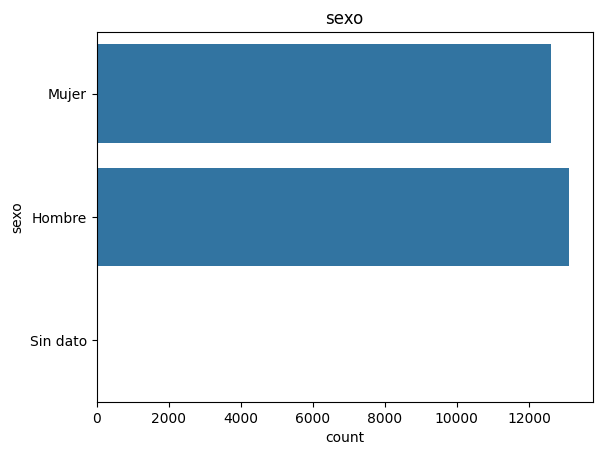

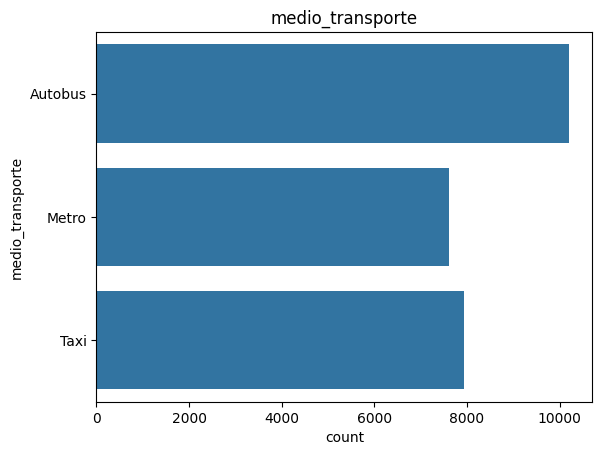

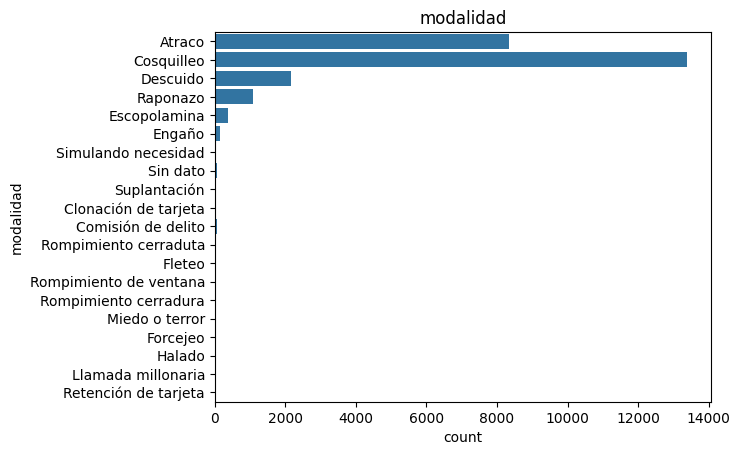

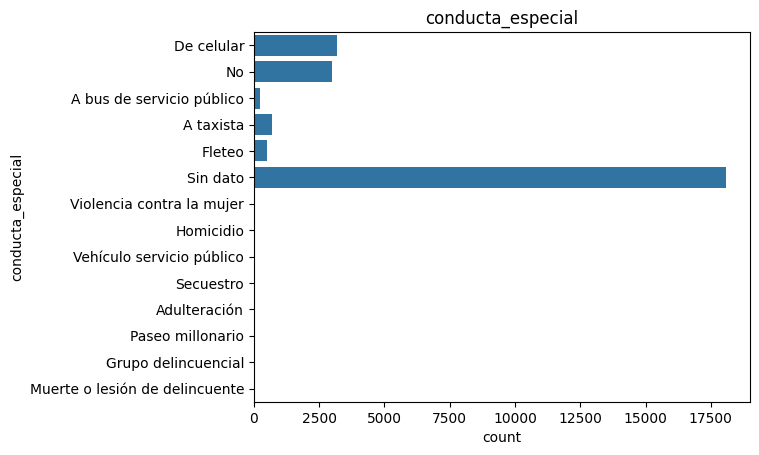

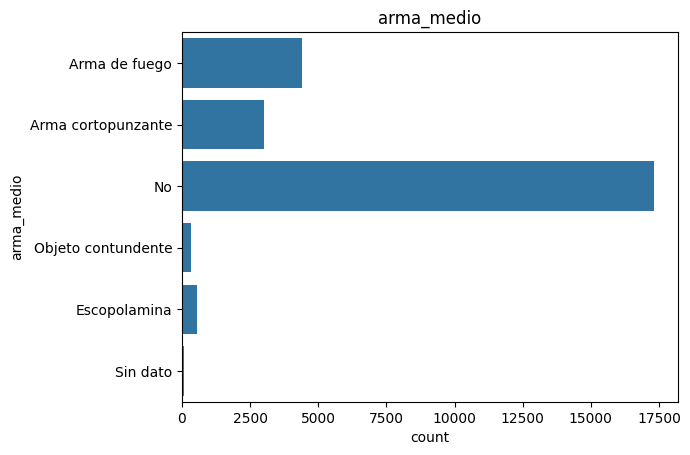

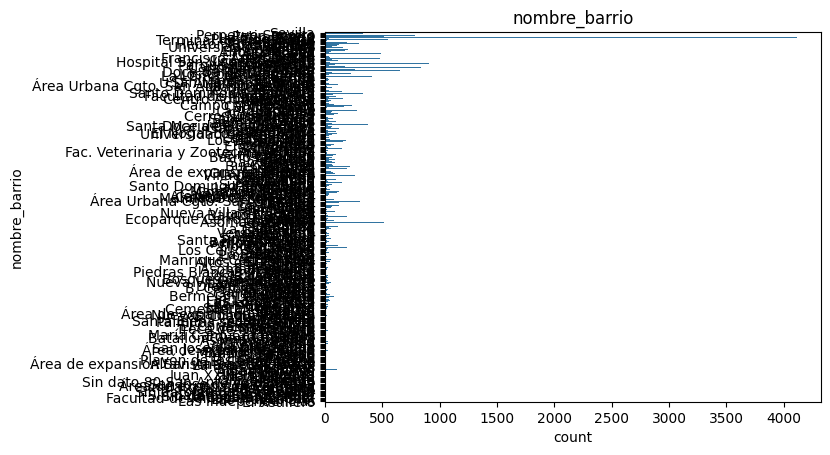

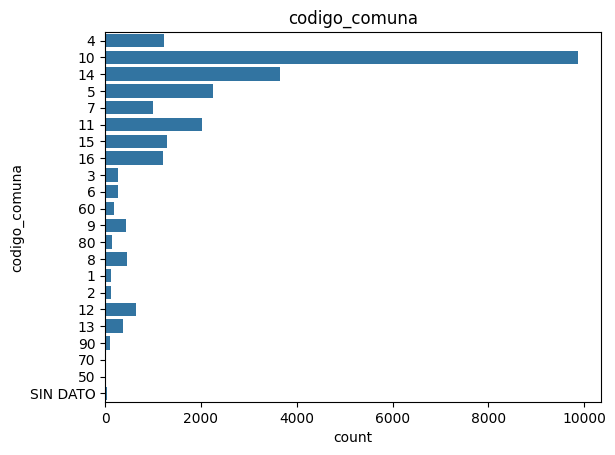

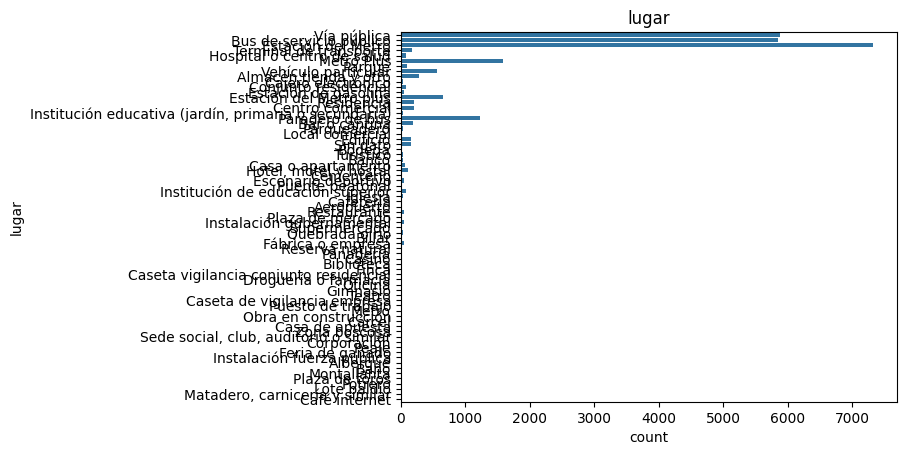

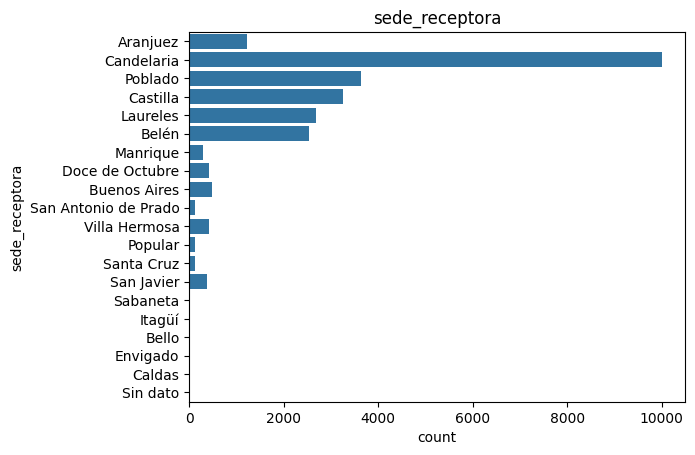

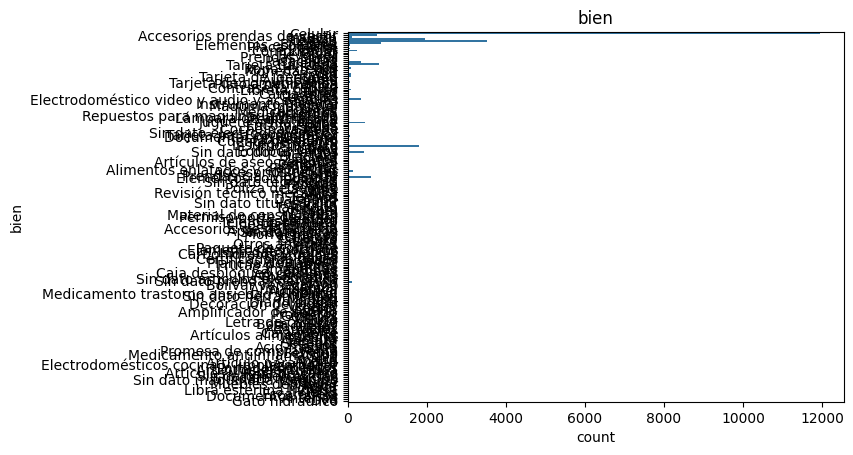

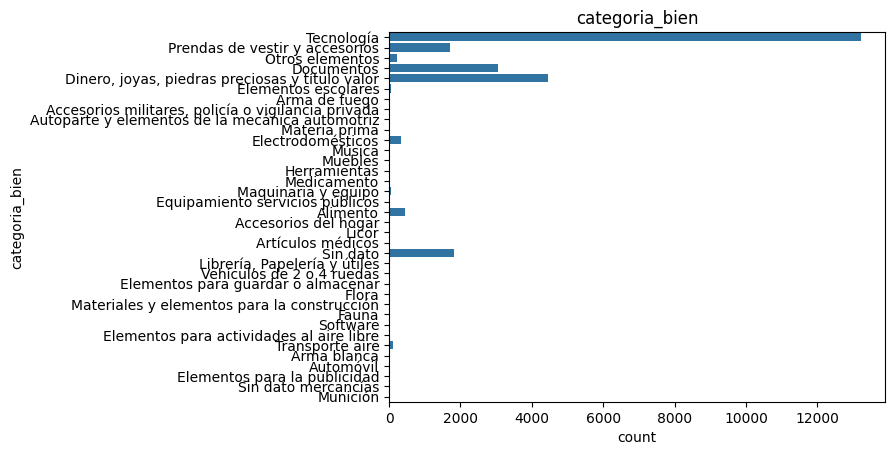

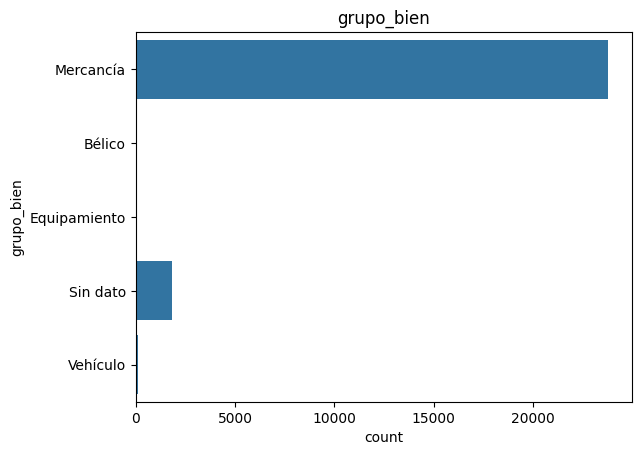

In [255]:
for columna in columnas_categoricas:
    sns.countplot(data = df_clean, y = columna )
    plt.title(columna)
    plt.show()

In [256]:
# Listado columnas númericas
columnas_numericas = [x for x in df_clean.columns.to_list() if df_clean[x].dtype != "object"]
columnas_numericas

['edad', 'Año', 'Mes']

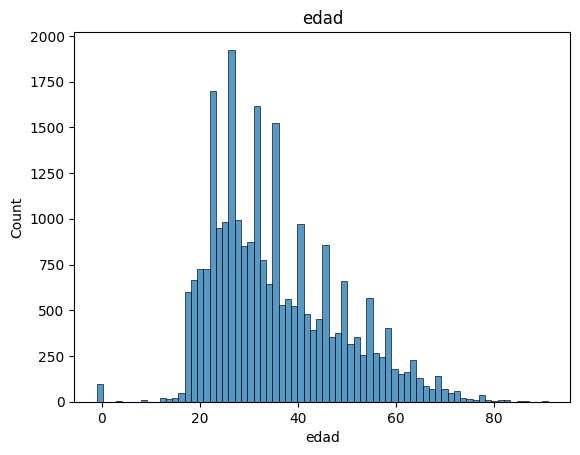

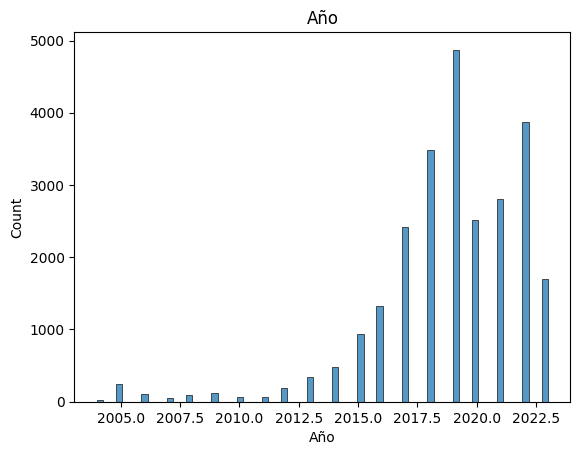

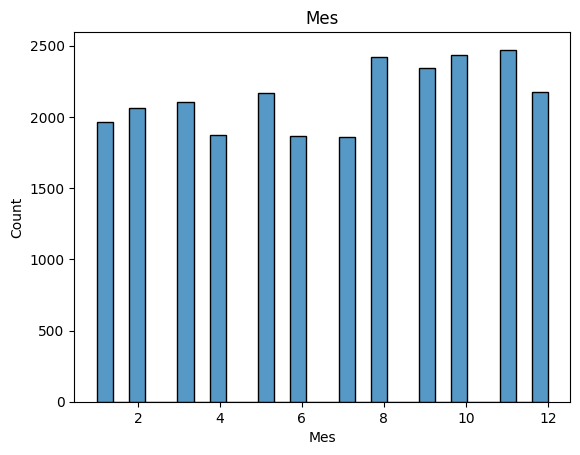

In [257]:
for columna in columnas_numericas:
    sns.histplot(data = df_clean, x = columna )
    plt.title(columna)
    plt.show()

### P1: Analizar los hurtos para el último año en el conjunto de datos (esto implica procesar los datos para extraer las fechas)

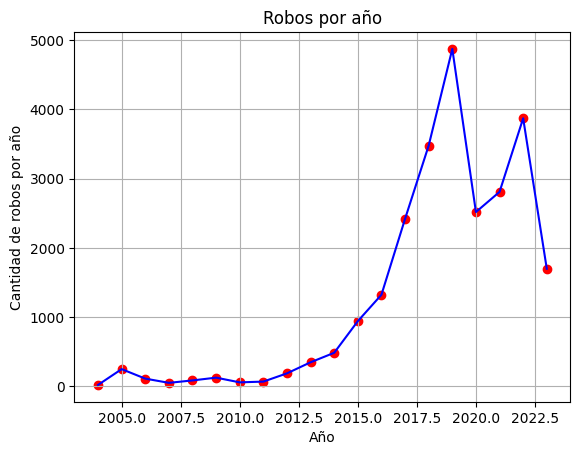

In [258]:
# Robos por año.
robos_año = df_clean["Año"].value_counts().reset_index()
robos_año = robos_año.sort_values(by="Año",ascending=False)

# Grafica
plt.plot(robos_año["Año"], robos_año["count"],color  = "b")
plt.scatter(robos_año["Año"], robos_año["count"], color  = "r")
plt.title("Robos por año")
plt.xlabel("Año")
plt.xlim(2003,2024)
plt.ylabel("Cantidad de robos por año")
plt.grid()
plt.show()

In [259]:
año_analisis = 2023
dfp1 = df[df["Año"] == año_analisis]

Variables categoricas

In [260]:
columnas_categoricas

['sexo',
 'medio_transporte',
 'modalidad',
 'conducta_especial',
 'arma_medio',
 'nombre_barrio',
 'codigo_comuna',
 'lugar',
 'sede_receptora',
 'bien',
 'categoria_bien',
 'grupo_bien']

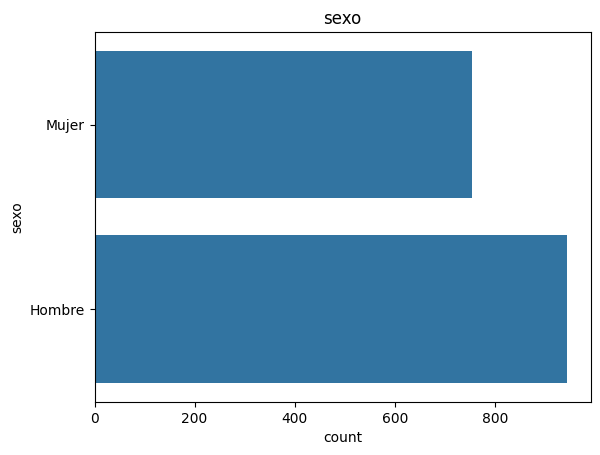

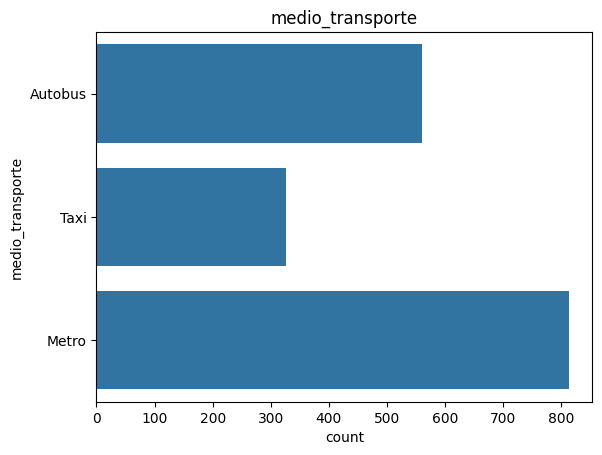

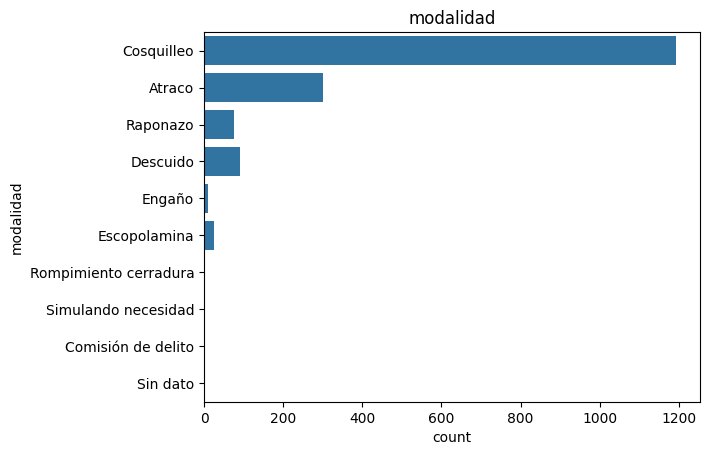

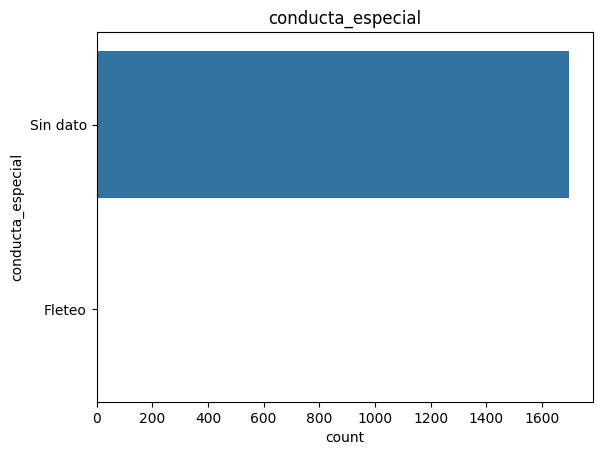

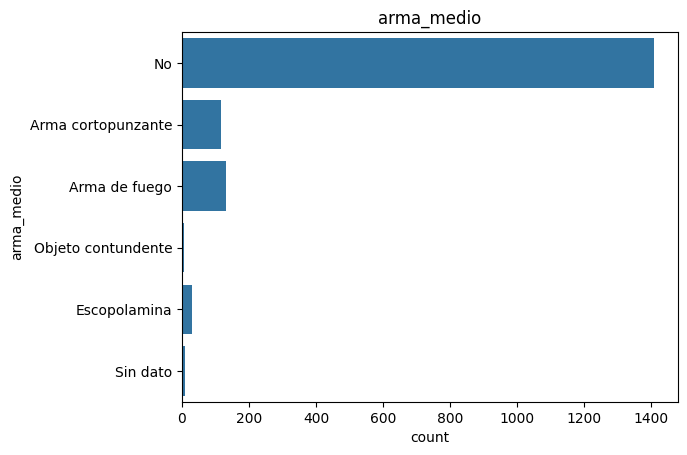

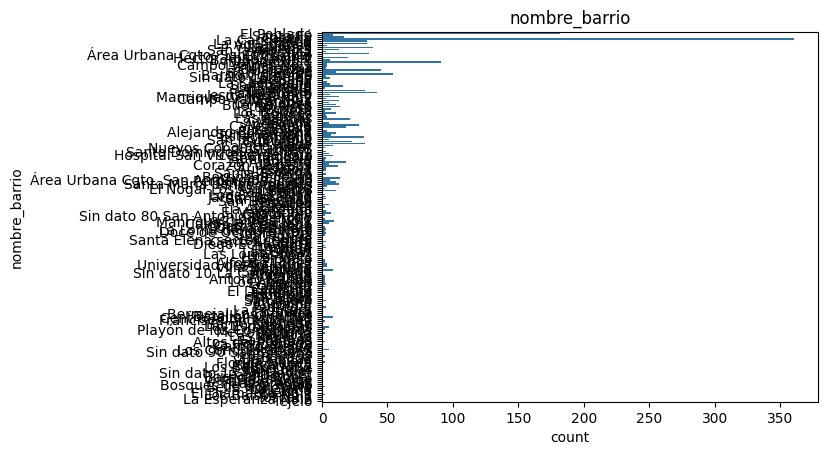

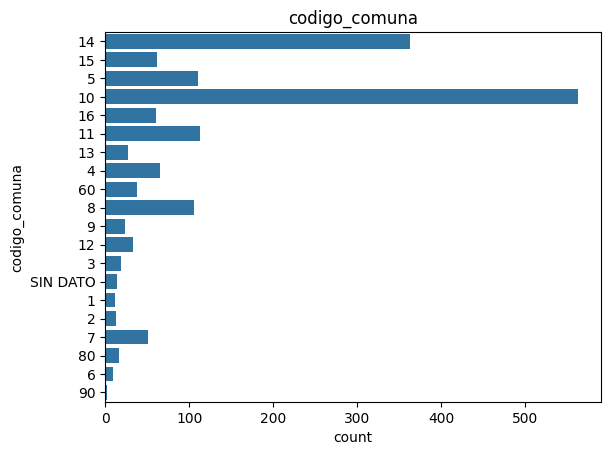

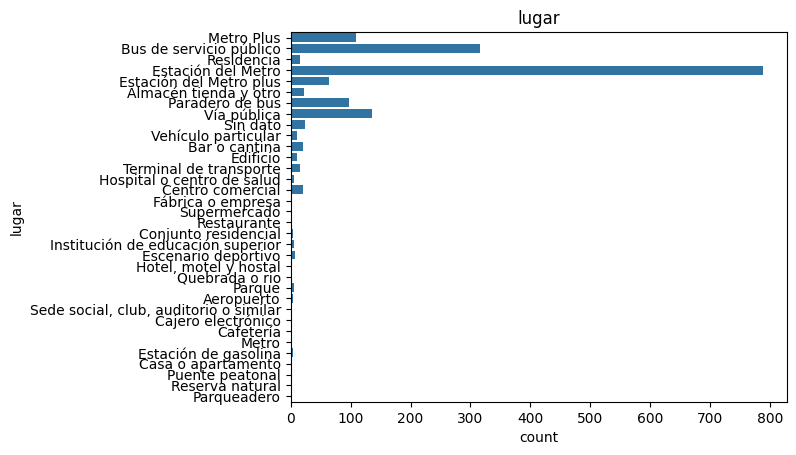

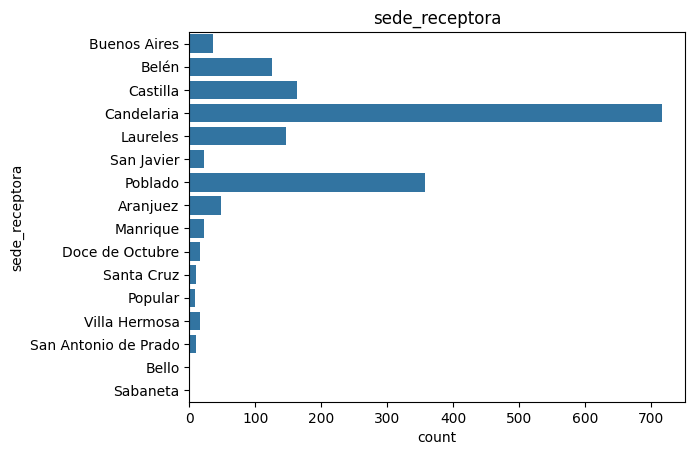

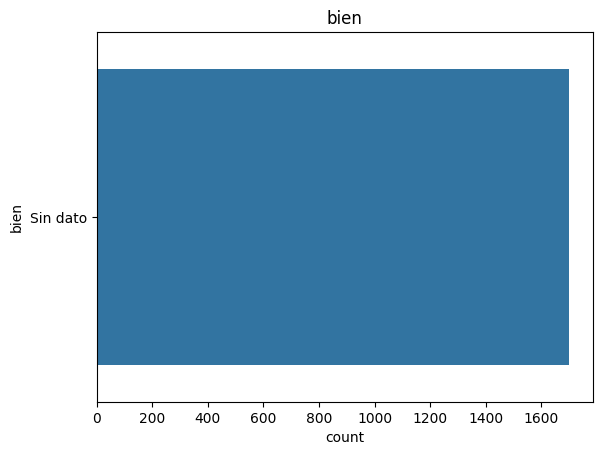

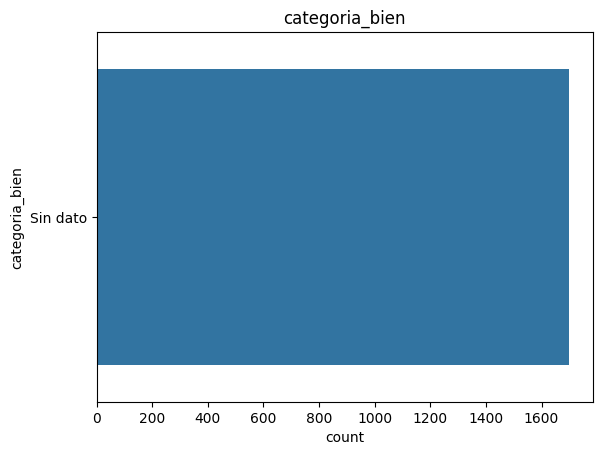

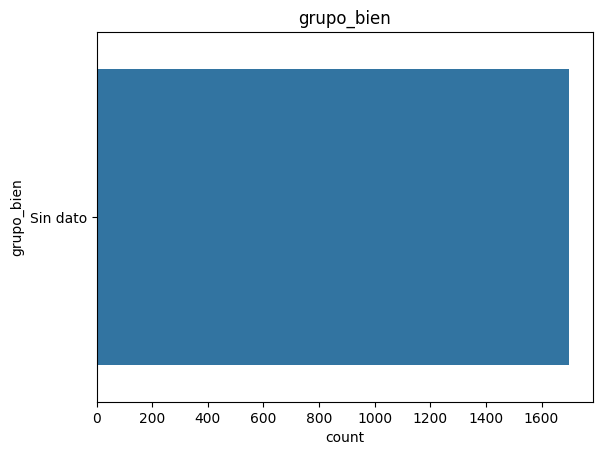

In [261]:
for columna in columnas_categoricas:
    sns.countplot(data = dfp1, y = columna )
    plt.title(columna)
    plt.show()